<a href="https://colab.research.google.com/github/ricardogomesmatos/CervejariaSPZ/blob/main/Projeto_Final_An%C3%A1lise_SPZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Cervejaria Speranza

Neste projeto iremos analisar os dados da cervejaria, do dia 01/01/2022 ao dia 17/04/2022. Já que a empresa vem passando por um processo de evolução, analisaremos os dados desde o início da implementação sistêmica.
Considerando que eles abrem normalmente sexta, sábado e domingo das 11h às 18h, faremos uma análise dos dias e produtos vendidos.


De acordo com a LGPD, os sócios da Cervejaria Speranza autorizaram a divulgação da análise dos dados para portifólio.

# Banco de Dados

Os dados fornecidos representam vendas total/dia por item. 

In [ ]:
# Importando as bibliotecas usadas nesta análise

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Importando a tabela origem, fornecida pelo cliente

tabela_vendas = pd.read_excel('Analise_2022_SPZ.xlsx')
tabela_vendas

,Cód produto,Descrição,Quantidade Vendida,Valor Unitário,Valor Bruto,Data
0,72,AGUA,11,4.0,44.0,2022-01-01
1,73,AGUA COM GAS,6,5.0,30.0,2022-01-01
2,362,BATATA FRITA TRADICIONAL,4,22.0,88.0,2022-01-01
3,42,BATATA RUSTICA,5,28.0,140.0,2022-01-01
4,83,BOLINHO DE BACALHAU,3,40.0,120.0,2022-01-01
...,...,...,...,...,...,...
1436,48,STEAK ANCHO,4,100.0,400.0,2022-04-17
1437,231,TILÁPIA,12,55.0,660.0,2022-04-17
1438,68,UVA 300ML,6,6.0,36.0,2022-04-17
1439,70,UVA 900ML,1,13.0,13.0,2022-04-17


In [ ]:
#Renomear as colunas para ter uma procura mais simplificada
renomear = {'Cód produto' : 'cod',
            'Descrição' : 'descricao',
            'Quantidade Vendida' : 'quantidade_vendida',
            'Valor Unitário' : 'valor_unitario',
            'Valor Bruto' : 'valor_bruto',
            'Data' : 'data'}
tabela_vendas = tabela_vendas.rename(columns = renomear)
tabela_vendas.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,72,AGUA,11,4.0,44.0,2022-01-01
1,73,AGUA COM GAS,6,5.0,30.0,2022-01-01
2,362,BATATA FRITA TRADICIONAL,4,22.0,88.0,2022-01-01
3,42,BATATA RUSTICA,5,28.0,140.0,2022-01-01
4,83,BOLINHO DE BACALHAU,3,40.0,120.0,2022-01-01


In [ ]:
#Agrupar os itens por descrição, para saber o total de vendas de cada item.

item_vendido = tabela_vendas[['cod', 'descricao', 'quantidade_vendida', 'valor_bruto']].groupby(['descricao', 'cod']).sum()
item_vendido.head(5)

,,quantidade_vendida,valor_bruto
descricao,cod,,
ADICIONAL PAO,59,16,94.5
AGUA,72,497,1988.0
AGUA COM GAS,73,295,1475.0
ARROZ,53,193,1158.0
ARROZ CARRETEIRO,396,114,1815.0


#Classificação dos itens

A classificação dos tipos servirá para fazer um estudo separado e descritivo de cada produto, separado por segmento. Servirá para uso no dashboard no PowerBI.

In [ ]:
# Para melhor seleção e ter uma boa visão geral, vamos separar os itens em 4 tipos:
# -Cervejas Especiais: São aquelas produzidas na própria Cervejaria.
# -Bebidas não especiais: São as bebidas terceirizadas, com baixo lucro.
# -Alimentos especiais: São os alimentos, de modo geral, vendidos no restaurante.
# -Sobremesas: Sobremesas vendidas no restaurante.

list(tabela_vendas['descricao'].drop_duplicates())

['AGUA',
 'AGUA COM GAS',
 'BATATA FRITA TRADICIONAL',
 'BATATA RUSTICA',
 'BOLINHO DE BACALHAU',
 'CACHAÇA',
 'CHOPP VINHO',
 'COCADA DE FORNO',
 'COCA LATA',
 'CONSERVA SPERANZA',
 'CORDEIRO PERNIL',
 'COSTELA DE PORCO DEFUMADA',
 'DADINHO DE TAPIOCA',
 'FRITAS TRADICIONAL',
 'GUARANA LATA',
 'HEINEKEN SEM ALCOOL',
 'IPA',
 'LARANJA 300ML',
 'LARANJA 900ML',
 'LINGUIÇA',
 'PICANHA',
 'PILSEN',
 'PORCO NA LATA',
 "PRATO KID'S",
 'RAGÚ DE CUPIM',
 'REGUA DEGUSTACAO',
 'STEAK ANCHO',
 'TAÇA DE ESPUMANTE',
 'TILÁPIA',
 'UVA 300ML',
 'VIENNA LAGER',
 'ADICIONAL PAO',
 'ARROZ',
 'CONSERVA GILO',
 'FAROFA BACON',
 'FEIJÃO',
 'GIN',
 'IPA LITRO/ GROWLER',
 'ISCA CARNE SOL',
 'MEIA PORÇÃO DE PICANHA',
 'MOLHO CHIMICHURI',
 'MOLHO MAIONESE',
 'PAIOL UNIDADE',
 'PURÊ DE BANANA DA TERRA',
 'UVA 900ML',
 'CONSERVAS PEPINO',
 'MEIA PORÇÃO DE PORCO NA LATA',
 'MOLHO MOSTARDA DIJON',
 'TORTA CRUMBLE DE MORANGO',
 'VINHO CASILLERO DEL DIABLO GARRAFA',
 'MEIA PORÇÃO DE FRITAS',
 'MEIA PORÇÃO DE ISCA D

## Cervejas Especiais

In [ ]:
# Na lista da descrição, separamos as cervejas especiais

cervas_copo = ['CHOPP VINHO',
'IPA',
'PILSEN',
'REGUA DEGUSTACAO',
'VIENNA LAGER',
'GIN',
'BELGA',
 ]


In [ ]:
# Criaremos um DF com as cervejas especiais para poder fazer uma análise separada do item
# Organizaremos o Index para ter uma melhor referência

especiais = tabela_vendas['descricao'].isin(cervas_copo)
dados_cerva = tabela_vendas[especiais]
dados_cerva.index = range(dados_cerva.shape[0])
dados_cerva.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,64,CHOPP VINHO,13,12.0,156.0,Janeiro
1,62,IPA,46,14.0,644.0,Janeiro
2,60,PILSEN,52,11.0,572.0,Janeiro
3,57,REGUA DEGUSTACAO,14,28.0,392.0,Janeiro
4,63,VIENNA LAGER,41,13.0,533.0,Janeiro


In [ ]:
# Exportar a tabela para usar no Dashboard do PowerBI

dados_cerva.to_excel('cervejas_especiais.xlsx', index=True)

In [ ]:
# Cervejas especiais agrupadas por data

especiais = dados_cerva[['cod', 'descricao', 'quantidade_vendida', 'valor_bruto', 'data']].groupby(['cod', 'descricao', 'data']).sum()
especiais

quantidade_vendida  valor_bruto
cod descricao        data                                       
57  REGUA DEGUSTACAO 2022-01-01                  14        392.0
                     2022-01-02                  16        448.0
                     2022-01-07                   6        168.0
                     2022-01-08                   7        196.0
                     2022-01-09                   7        196.0
...                                             ...          ...
206 BELGA            2022-04-08                   2         32.0
                     2022-04-09                  12        192.0
                     2022-04-10                   9        144.0
                     2022-04-16                  16        256.0
                     2022-04-17                  11        176.0

[288 rows x 2 columns]

## Alimentos Especiais

In [ ]:
# Na lista da descrição, separamos os Alimentos especiais

pratos = [ 'BATATA FRITA TRADICIONAL',
 'BATATA RUSTICA',
 'BOLINHO DE BACALHAU',
 'CONSERVA SPERANZA',
 'CORDEIRO PERNIL',
 'COSTELA DE PORCO DEFUMADA',
 'DADINHO DE TAPIOCA',
 'FRITAS TRADICIONAL',
 'LINGUIÇA',
 'PICANHA',
 'PORCO NA LATA',
 "PRATO KID'S",
 'RAGÚ DE CUPIM',
 'STEAK ANCHO',
 'TILÁPIA',
 'ADICIONAL PAO',
 'ARROZ',
 'CONSERVA GILO',
 'FAROFA BACON',
 'FEIJÃO',
 'ISCA CARNE SOL',
 'MEIA PORÇÃO DE PICANHA',
 'PURÊ DE BANANA DA TERRA',
 'CONSERVAS PEPINO',
 'MEIA PORÇÃO DE PORCO NA LATA',
 'MEIA PORÇÃO DE FRITAS',
 'MEIA PORÇÃO DE ISCA DE CARNE DE SOL',
 'CONSERVA CEBOLA',
 'ARROZ CARRETEIRO',
 'EVENTO BATATA FRITA',
 'EVENTO CHOPP VERDE',
 'EVENTO ISCA DE BOI',
 'EVENTO ISCA DE FRANGO',
 'EVENTO ISCA DE PORCO',
 'MEIA PORÇÃO DE LINGUIÇA',
 'REFEIÇÃO']

In [ ]:
# Criaremos um DF com os alimentos especiais para poder fazer uma análise separada do item
# Organizaremos o Index para ter uma melhor referência

refeicao = tabela_vendas['descricao'].isin(pratos)
dados_pratos = tabela_vendas[refeicao]
dados_pratos.index = range(dados_pratos.shape[0])
dados_pratos.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,362,BATATA FRITA TRADICIONAL,4,22.0,88.0,Janeiro
1,42,BATATA RUSTICA,5,28.0,140.0,Janeiro
2,83,BOLINHO DE BACALHAU,3,40.0,120.0,Janeiro
3,40,CONSERVA SPERANZA,1,26.0,26.0,Janeiro
4,82,CORDEIRO PERNIL,1,90.0,90.0,Janeiro


In [ ]:
# Exportar a tabela para usar no Dashboard do PowerBI

dados_pratos.to_excel('dados_pratos.xlsx', index=True)

In [ ]:
# Alimentos Especiais agrupados por data

pratosespeciais = dados_pratos[['cod', 'descricao', 'quantidade_vendida', 'valor_bruto', 'data']].groupby(['cod', 'descricao', 'data']).sum()
pratosespeciais.head(15)

quantidade_vendida  valor_bruto
cod descricao         data                                       
40  CONSERVA SPERANZA 2022-01-01                   1         26.0
                      2022-01-02                   2         52.0
                      2022-01-07                   3         78.0
                      2022-01-08                   3         78.0
                      2022-01-13                   1         26.0
                      2022-01-16                   3         78.0
                      2022-01-23                   3         78.0
                      2022-01-30                   1         26.0
                      2022-02-04                   1         26.0
                      2022-02-06                   1         26.0
                      2022-02-13                   6        156.0
                      2022-02-19                   5        130.0
                      2022-02-26                   4        104.0
                      2022-02-27                   4        104.0
                      2022-02-28                   2         52.0

## Bebidas não especiais

In [ ]:
# Na lista da descrição, separamos as Bebidas não especiais

bebidas = ['AGUA',
 'AGUA COM GAS',
 'CACHAÇA',
 'COCA LATA',
 'GUARANA LATA',
 'HEINEKEN SEM ALCOOL',
 'LARANJA 300ML',
 'LARANJA 900ML',
 'TAÇA DE ESPUMANTE',
 'UVA 300ML',
 'UVA 900ML',
 'VINHO CASILLERO DEL DIABLO GARRAFA',
 'UVA',
 'VINHO SANTA HELENA GARRAFA',
 ]


In [ ]:
# Criaremos um DF com as Bebidas não especiais para poder fazer uma análise separada do item
# Organizaremos o Index para ter uma melhor referência

bebidasextras = tabela_vendas['descricao'].isin(bebidas)
dados_bebida = tabela_vendas[bebidasextras]
dados_bebida.index = range(dados_bebida.shape[0])
dados_bebida

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,72,AGUA,11,4.0,44.0,2022-01-01
1,73,AGUA COM GAS,6,5.0,30.0,2022-01-01
2,75,CACHAÇA,1,6.0,6.0,2022-01-01
3,66,COCA LATA,5,6.0,30.0,2022-01-01
4,67,GUARANA LATA,4,6.0,24.0,2022-01-01
...,...,...,...,...,...,...
388,66,COCA LATA,18,6.0,108.0,2022-04-17
389,67,GUARANA LATA,9,6.0,54.0,2022-04-17
390,69,LARANJA 300ML,7,6.0,42.0,2022-04-17
391,68,UVA 300ML,6,6.0,36.0,2022-04-17


In [ ]:
# Exportar a tabela para usar no Dashboard do PowerBI

dados_bebida.to_excel('bebidas_extras.xlsx', index=True)

In [ ]:
# Bebidas não especiais agrupadas por data

tabela_bebidas_extras = dados_bebida[['cod', 'descricao', 'quantidade_vendida', 'valor_bruto', 'data']].groupby(['cod', 'descricao', 'data']).sum()
tabela_bebidas_extras

quantidade_vendida  valor_bruto
cod descricao         data                                       
66  COCA LATA         2022-01-01                   5         30.0
                      2022-01-02                  16         96.0
                      2022-01-07                   3         18.0
                      2022-01-08                  13         78.0
                      2022-01-13                   2         12.0
...                                              ...          ...
361 TAÇA DE ESPUMANTE 2022-04-02                   2         20.0
                      2022-04-03                   2         20.0
                      2022-04-09                   3         30.0
                      2022-04-10                   1         10.0
                      2022-04-16                   3         30.0

[393 rows x 2 columns]

## Sobremesas

In [ ]:
# Na lista da descrição, separamos as sobremesas

sobremesas = ['COCADA DE FORNO',
 'TORTA CRUMBLE DE MORANGO',
 'PUDIM TRADICIONAL']

In [ ]:
# Criaremos um DF com as sobremesas para poder fazer uma análise separada do item
# Organizaremos o Index para ter uma melhor referência

sobremesas_extra = tabela_vendas['descricao'].isin(sobremesas)
sobremesas_extra = tabela_vendas[sobremesas_extra]
sobremesas_extra.index = range(sobremesas_extra.shape[0])
sobremesas_extra.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,355,COCADA DE FORNO,13,18.0,234.0,2022-01-01
1,355,COCADA DE FORNO,12,18.0,216.0,2022-01-02
2,355,COCADA DE FORNO,7,18.0,126.0,2022-01-07
3,355,COCADA DE FORNO,8,18.0,144.0,2022-01-08
4,370,TORTA CRUMBLE DE MORANGO,1,18.0,18.0,2022-01-08


In [ ]:
# Exportar a tabela para usar no Dashboard do PowerBI

sobremesas_extra.to_excel('sobremesas_extra.xlsx', index=True)

In [ ]:
# Sobremesas agrupadas por data

tabela_sobremesas_extra = sobremesas_extra[['cod', 'descricao', 'quantidade_vendida', 'valor_bruto', 'data']].groupby(['cod', 'descricao', 'data']).sum()
tabela_sobremesas_extra.head(5)

quantidade_vendida  valor_bruto
cod descricao         data                                       
55  PUDIM TRADICIONAL 2022-03-05                   1         10.0
                      2022-03-06                   1         10.0
                      2022-03-12                   3         30.0
                      2022-03-13                   2         20.0
                      2022-03-27                   2         20.0

# Tabela segmentada
Para termos um melhor entendimento dos gráficos que desenvolveremos futuramente, segmentar a tabela por tipo fará com que, com uma visão geral, possamos focar numa análise de dados específica.

In [ ]:
# Copiar a tabela vendas, dando um outro título para não mexer na tabela original tratada

tabela_segmentada = tabela_vendas.copy()

In [ ]:
# Para segmentar a tabela, utilizaremos uma palavra comum entre os itens para poder separa-los
# Esse estudo nos trará um detalhamento de uma maneira geral 

renomearcomida = { 'BATATA FRITA TRADICIONAL': 'alimento',
 'BATATA RUSTICA': 'alimento',
 'BOLINHO DE BACALHAU': 'alimento',
 'CONSERVA SPERANZA': 'alimento',
 'CORDEIRO PERNIL': 'alimento',
 'COSTELA DE PORCO DEFUMADA': 'alimento',
 'DADINHO DE TAPIOCA': 'alimento',
 'FRITAS TRADICIONAL': 'alimento',
 'LINGUIÇA': 'alimento',
 'PICANHA': 'alimento',
 'PORCO NA LATA': 'alimento',
 "PRATO KID'S": 'alimento',
 'RAGÚ DE CUPIM': 'alimento',
 'STEAK ANCHO': 'alimento',
 'TILÁPIA': 'alimento',
 'ADICIONAL PAO': 'alimento',
 'ARROZ': 'alimento',
 'CONSERVA GILO': 'alimento',
 'FAROFA BACON': 'alimento',
 'FEIJÃO': 'alimento',
 'ISCA CARNE SOL': 'alimento',
 'MEIA PORÇÃO DE PICANHA': 'alimento',
 'PURÊ DE BANANA DA TERRA': 'alimento',
 'CONSERVAS PEPINO': 'alimento',
 'MEIA PORÇÃO DE PORCO NA LATA': 'alimento',
 'MEIA PORÇÃO DE FRITAS': 'alimento',
 'MEIA PORÇÃO DE ISCA DE CARNE DE SOL': 'alimento',
 'CONSERVA CEBOLA': 'alimento',
 'ARROZ CARRETEIRO': 'alimento',
 'EVENTO BATATA FRITA': 'alimento',
 'EVENTO CHOPP VERDE': 'alimento',
 'EVENTO ISCA DE BOI': 'alimento',
 'EVENTO ISCA DE FRANGO': 'alimento',
 'EVENTO ISCA DE PORCO': 'alimento',
 'MEIA PORÇÃO DE LINGUIÇA': 'alimento',
 'REFEIÇÃO': 'alimento'}

In [ ]:
# Vamos designar todos esses itens para uma só denominação, passaremos a chama-los de Alimentos

tabela_segmentada['descricao'].value_counts()
tabela_segmentada.replace({ 'BATATA FRITA TRADICIONAL': 'alimento',
 'BATATA RUSTICA': 'alimento',
 'BOLINHO DE BACALHAU': 'alimento',
 'CONSERVA SPERANZA': 'alimento',
 'CORDEIRO PERNIL': 'alimento',
 'COSTELA DE PORCO DEFUMADA': 'alimento',
 'DADINHO DE TAPIOCA': 'alimento',
 'FRITAS TRADICIONAL': 'alimento',
 'LINGUIÇA': 'alimento',
 'PICANHA': 'alimento',
 'PORCO NA LATA': 'alimento',
 "PRATO KID'S": 'alimento',
 'RAGÚ DE CUPIM': 'alimento',
 'STEAK ANCHO': 'alimento',
 'TILÁPIA': 'alimento',
 'ADICIONAL PAO': 'alimento',
 'ARROZ': 'alimento',
 'CONSERVA GILO': 'alimento',
 'FAROFA BACON': 'alimento',
 'FEIJÃO': 'alimento',
 'ISCA CARNE SOL': 'alimento',
 'MEIA PORÇÃO DE PICANHA': 'alimento',
 'PURÊ DE BANANA DA TERRA': 'alimento',
 'CONSERVAS PEPINO': 'alimento',
 'MEIA PORÇÃO DE PORCO NA LATA': 'alimento',
 'MEIA PORÇÃO DE FRITAS': 'alimento',
 'MEIA PORÇÃO DE ISCA DE CARNE DE SOL': 'alimento',
 'CONSERVA CEBOLA': 'alimento',
 'ARROZ CARRETEIRO': 'alimento',
 'EVENTO BATATA FRITA': 'alimento',
 'EVENTO CHOPP VERDE': 'alimento',
 'EVENTO ISCA DE BOI': 'alimento',
 'EVENTO ISCA DE FRANGO': 'alimento',
 'EVENTO ISCA DE PORCO': 'alimento',
 'MEIA PORÇÃO DE LINGUIÇA': 'alimento',
 'REFEIÇÃO': 'alimento',
 'MOLHO MAIONESE': 'alimento',
 'MOLHO PIMENTAO VERMELHO': 'alimento',
 'MOLHO CHIMICHURI': 'alimento', 
 'MOLHO MOSTARDA DIJON': 'alimento' }, inplace=True)
tabela_segmentada
tabela_segmentada['descricao'].value_counts()

alimento     666
bebidas      422
chopp        288
sobremesa     52
Name: descricao, dtype: int64

In [ ]:
# Vamos designar todos esses itens para uma só denominação, passaremos a chama-los de Chopp

tabela_segmentada['descricao'].value_counts()
tabela_segmentada.replace({'CHOPP VINHO': 'chopp',
'IPA': 'chopp',
'PILSEN': 'chopp',
'REGUA DEGUSTACAO': 'chopp',
'VIENNA LAGER': 'chopp',
'GIN': 'chopp',
'BELGA': 'chopp'}, inplace=True)
tabela_segmentada
tabela_segmentada['descricao'].value_counts()

alimento     666
bebidas      422
chopp        288
sobremesa     52
Name: descricao, dtype: int64

In [ ]:
# Vamos designar todos esses itens para uma só denominação, passaremos a chama-los de Sobremesa

tabela_segmentada['descricao'].value_counts()
tabela_segmentada.replace({'COCADA DE FORNO': 'sobremesa',
 'TORTA CRUMBLE DE MORANGO': 'sobremesa',
 'PUDIM TRADICIONAL': 'sobremesa'}, inplace=True)
tabela_segmentada
tabela_segmentada['descricao'].value_counts()

alimento     666
bebidas      422
chopp        288
sobremesa     52
Name: descricao, dtype: int64

In [ ]:
# Vamos designar todos esses itens para uma só denominação, passaremos a chama-los de Bebidas

tabela_segmentada['descricao'].value_counts()
tabela_segmentada.replace({'AGUA': 'bebidas',
 'AGUA COM GAS': 'bebidas',
 'CACHAÇA': 'bebidas',
 'COCADA DE FORNO': 'bebidas',
 'COCA LATA': 'bebidas',
 'GUARANA LATA': 'bebidas',
 'HEINEKEN SEM ALCOOL': 'bebidas',
 'LARANJA 300ML': 'bebidas',
 'LARANJA 900ML': 'bebidas',
 'TAÇA DE ESPUMANTE': 'bebidas',
 'UVA 300ML': 'bebidas',
 'IPA LITRO/ GROWLER': 'bebidas',
 'UVA 900ML': 'bebidas',
 'VINHO CASILLERO DEL DIABLO GARRAFA': 'bebidas',
 'PILSEN LITRO/ GROWLER': 'bebidas',
 'CHOPP VINHO LITRO/ GROWLER': 'bebidas',
 'BELGA LITRO/ GROWLER': 'bebidas',
 'UVA': 'bebidas',
 'VINHO SANTA HELENA GARRAFA': 'bebidas',
 'PUDIM TRADICIONAL': 'bebidas',
 'VIENNA LITRO/ GROWLER': 'bebidas',
 'SESSION IPA': 'bebidas'}, inplace=True)
tabela_segmentada
tabela_segmentada['descricao'].value_counts()

alimento     666
bebidas      422
chopp        288
sobremesa     52
Name: descricao, dtype: int64

In [ ]:
# Sem precisar criar um Boxplot, já se observa uns Outliers, tanto o Paiol Unidade, quanto o Maço Paiol são dados irrelevantes para a nossa análise
# Por não se enquadrar em nenhum item segmentado, é um dado insignificante para o nosso estudo

tabela_segmentada.drop(tabela_segmentada.loc[tabela_segmentada['descricao'] == 'PAIOL UNIDADE'].index, inplace=True)
tabela_segmentada.drop(tabela_segmentada.loc[tabela_segmentada['descricao'] == 'MAÇO PAIOL'].index, inplace=True)
tabela_segmentada

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,72,bebidas,11,4.0,44.0,2022-01-01
1,73,bebidas,6,5.0,30.0,2022-01-01
2,362,alimento,4,22.0,88.0,2022-01-01
3,42,alimento,5,28.0,140.0,2022-01-01
4,83,alimento,3,40.0,120.0,2022-01-01
...,...,...,...,...,...,...
1436,48,alimento,4,100.0,400.0,2022-04-17
1437,231,alimento,12,55.0,660.0,2022-04-17
1438,68,bebidas,6,6.0,36.0,2022-04-17
1439,70,bebidas,1,13.0,13.0,2022-04-17


In [ ]:
# Agruparemos a tabela segmentada por descrição, para uma vizualização geral das nossas vendas

tabela_segmentada2 = tabela_segmentada[['cod', 'descricao', 'quantidade_vendida', 'valor_bruto']].groupby(['descricao']).sum()
tabela_segmentada2

,cod,quantidade_vendida,valor_bruto
descricao,,,
alimento,84940,2461,85655.5
bebidas,47639,2199,15196.0
chopp,22525,6161,81895.0
sobremesa,15205,264,4576.0


In [ ]:
# Exportar a tabela para usar no Dashboard do PowerBI

tabela_segmentada2.to_excel('tabela_segmentada.xlsx', index=True)

# Faturamento nos meses
Lembrando que a análise começou no dia 01/01/2022 e terminou no dia 17/04/2022, o mês de abril está comprometido e o representa parcialmente. 

##Vendas em Janeiro

In [ ]:
# Pegaremos a tabela inicial e vamos separar por meses, para fazer o estudo mensal de vendas

tabela_vendas['data'].dt.month_name()

meses_ptbr = {'January':'Janeiro', 'February':'Fevereiro', 'March':'Março', 'April':'Abril', 'May':'Maio', 'June':'Junho', 'July':'Julho', 'August':'Agosto', 'September':'Setembro', 'October':'Outubro', 'November':'Novembro', 'December':'Dezembro'}
tabela_vendas['data'] = tabela_vendas['data'].dt.month_name().replace(meses_ptbr)

In [ ]:
# Selecionaremos Janeiro para a primeira análise

vendas_janeiro = tabela_vendas['data'] == 'Janeiro'
vendas_janeiro = tabela_vendas[vendas_janeiro]
vendas_janeiro

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,72,AGUA,11,4.0,44.0,Janeiro
1,73,AGUA COM GAS,6,5.0,30.0,Janeiro
2,362,BATATA FRITA TRADICIONAL,4,22.0,88.0,Janeiro
3,42,BATATA RUSTICA,5,28.0,140.0,Janeiro
4,83,BOLINHO DE BACALHAU,3,40.0,120.0,Janeiro
...,...,...,...,...,...,...
471,60,PILSEN,91,11.0,1001.0,Janeiro
472,45,PORCO NA LATA,2,55.0,110.0,Janeiro
473,361,TAÇA DE ESPUMANTE,1,10.0,10.0,Janeiro
474,231,TILÁPIA,5,55.0,275.0,Janeiro


In [ ]:
# Para sabermos o volume vendido, agruparemos os itens por descrição

item_janeiro = vendas_janeiro[['cod', 'descricao', 'quantidade_vendida', 'valor_bruto', 'data']].groupby(['cod', 'descricao', 'data']).sum()
item_janeiro.head(5)

,,,quantidade_vendida,valor_bruto
cod,descricao,data,,
40,CONSERVA SPERANZA,Janeiro,17,442.0
41,DADINHO DE TAPIOCA,Janeiro,47,1504.0
42,BATATA RUSTICA,Janeiro,10,280.0
44,LINGUIÇA,Janeiro,42,1890.0
45,PORCO NA LATA,Janeiro,35,1925.0


In [ ]:
# Print venda total Janeiro

venda_total_janeiro = item_janeiro['valor_bruto'].sum()
print(f'Em Janeiro, o faturamento bruto foi de R$ {venda_total_janeiro}')

Em Janeiro, o faturamento bruto foi de R$ 55768.7


No mês de Janeiro, foi constatado um faturamento de R$55768.7

## Vendas Fevereiro

In [ ]:
# Selecionaremos Fevereiro para a segunda análise

vendas_fevereiro = tabela_vendas['data'] == 'Fevereiro'
vendas_fevereiro = tabela_vendas[vendas_fevereiro]
vendas_fevereiro.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
476,72,AGUA,1,4.0,4.0,Fevereiro
477,73,AGUA COM GAS,1,5.0,5.0,Fevereiro
478,206,BELGA,2,16.0,32.0,Fevereiro
479,83,BOLINHO DE BACALHAU,1,40.0,40.0,Fevereiro
480,64,CHOPP VINHO,2,12.0,24.0,Fevereiro


In [ ]:
# Para sabermos o volume vendido, agruparemos os itens por descrição

item_fevereiro = vendas_fevereiro[['cod', 'descricao', 'quantidade_vendida', 'valor_bruto', 'data']].groupby(['cod', 'descricao', 'data']).sum()
item_fevereiro.head(5)

,,,quantidade_vendida,valor_bruto
cod,descricao,data,,
40,CONSERVA SPERANZA,Fevereiro,23,598.0
41,DADINHO DE TAPIOCA,Fevereiro,40,1280.0
44,LINGUIÇA,Fevereiro,50,2250.0
45,PORCO NA LATA,Fevereiro,31,1705.0
46,ISCA CARNE SOL,Fevereiro,32,1600.0


In [ ]:
# Print venda total Fevereiro

venda_total_fevereiro = item_fevereiro['valor_bruto'].sum()
print(f'Em Fevereiro, o faturamento bruto foi de R$ {venda_total_fevereiro}')

Em Fevereiro, o faturamento bruto foi de R$ 50090.3


No mês de Fevereiro, foi constatado um faturamento de R$ 50090.30

## Vendas Março

In [ ]:
# Selecionaremos Março para a terceira análise

vendas_marco = tabela_vendas['data'] == 'Março'
vendas_marco = tabela_vendas[vendas_marco]
vendas_marco.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
851,59,ADICIONAL PAO,1,5.9,5.9,Março
852,72,AGUA,9,4.0,36.0,Março
853,73,AGUA COM GAS,9,5.0,45.0,Março
854,53,ARROZ,8,6.0,48.0,Março
855,362,BATATA FRITA TRADICIONAL,12,22.0,264.0,Março


In [ ]:
# Para sabermos o volume vendido, agruparemos os itens por descrição

item_marco = vendas_marco[['cod', 'descricao', 'quantidade_vendida', 'valor_bruto', 'data']].groupby(['cod', 'descricao', 'data']).sum()
item_marco.head(5)

,,,quantidade_vendida,valor_bruto
cod,descricao,data,,
40,CONSERVA SPERANZA,Março,12,312.0
41,DADINHO DE TAPIOCA,Março,27,864.0
44,LINGUIÇA,Março,29,1305.0
45,PORCO NA LATA,Março,10,550.0
46,ISCA CARNE SOL,Março,23,1150.0


In [ ]:
# Print venda total Março

venda_total_marco = item_marco['valor_bruto'].sum()
print(f'Em Março, o faturamento bruto foi de R$ {venda_total_marco}')

Em Março, o faturamento bruto foi de R$ 49707.5


No mês de Março, foi constatado um faturamento de R$ 49707.5

## Vendas Abril 

In [ ]:
# Selecionaremos Abril para a quarta análise
# Lembrando que em Abril, a análise foi feita somente até o dia 17

vendas_abril = tabela_vendas['data'] == 'Abril'
vendas_abril = tabela_vendas[vendas_abril]
vendas_abril.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
1192,72,AGUA,1,4.0,4.0,Abril
1193,73,AGUA COM GAS,6,5.0,30.0,Abril
1194,362,BATATA FRITA TRADICIONAL,3,22.0,66.0,Abril
1195,83,BOLINHO DE BACALHAU,2,40.0,80.0,Abril
1196,64,CHOPP VINHO,1,12.0,12.0,Abril


In [ ]:
# Para sabermos o volume vendido, agruparemos os itens por descrição

item_abril = vendas_abril[['cod', 'descricao', 'quantidade_vendida', 'valor_bruto', 'data']].groupby(['cod', 'descricao', 'data']).sum()
item_abril.head(5)

,,,quantidade_vendida,valor_bruto
cod,descricao,data,,
40,CONSERVA SPERANZA,Abril,12,312.0
41,DADINHO DE TAPIOCA,Abril,23,736.0
44,LINGUIÇA,Abril,18,810.0
45,PORCO NA LATA,Abril,26,1430.0
46,ISCA CARNE SOL,Abril,14,700.0


In [ ]:
# Print venda até o dia 17 Abril

venda_total_abril = item_abril['valor_bruto'].sum()
print(f'Em Abril, até o dia 17 o faturamento bruto foi de R$ {venda_total_abril}')

Em Abril, até o dia 17 o faturamento bruto foi de R$ 31814.0


No mês de Abril, o faturamento bruto até o dia 17 foi de R$ 31814.0

# Vendas por dia da semana
Para ter uma visão mais realista, vamos destrinchar a tabela em dias para podermos comparar o faturamento de cada dia da semana.

In [ ]:
# Selecionaremos os dias da semana para ver o volume de vendas de cada dia
# Para isso, novamente, usaremos a tabela inicial fornecida pelo cliente

tabela_dias = pd.read_excel('Analise_2022_SPZ.xlsx')
tabela_dias

renomear = {'Cód produto' : 'cod',
            'Descrição' : 'descricao',
            'Quantidade Vendida' : 'quantidade_vendida',
            'Valor Unitário' : 'valor_unitario',
            'Valor Bruto' : 'valor_bruto',
            'Data' : 'data'}
tabela_dias = tabela_dias.rename(columns = renomear)
tabela_dias.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,72,AGUA,11,4.0,44.0,2022-01-01
1,73,AGUA COM GAS,6,5.0,30.0,2022-01-01
2,362,BATATA FRITA TRADICIONAL,4,22.0,88.0,2022-01-01
3,42,BATATA RUSTICA,5,28.0,140.0,2022-01-01
4,83,BOLINHO DE BACALHAU,3,40.0,120.0,2022-01-01


In [ ]:
# Com base na data, transformaremos os dias numéricos em strings contendo o dia da semana

tabela_dias['data'].dt.day_name()
dias_ptbr = {'Sunday':'Domingo', 'Monday':'Segunda-feira', 'Tuesday':'Terça-feira', 'Wednesday':'Quarta-feira', 'Thursday':'Quinta-feira', 'Friday':'Sexta-feira', 'Saturday': 'Sábado'}
tabela_dias['data'] = tabela_dias['data'].dt.day_name().replace(dias_ptbr)
tabela_dias

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,72,AGUA,11,4.0,44.0,Sábado
1,73,AGUA COM GAS,6,5.0,30.0,Sábado
2,362,BATATA FRITA TRADICIONAL,4,22.0,88.0,Sábado
3,42,BATATA RUSTICA,5,28.0,140.0,Sábado
4,83,BOLINHO DE BACALHAU,3,40.0,120.0,Sábado
...,...,...,...,...,...,...
1436,48,STEAK ANCHO,4,100.0,400.0,Domingo
1437,231,TILÁPIA,12,55.0,660.0,Domingo
1438,68,UVA 300ML,6,6.0,36.0,Domingo
1439,70,UVA 900ML,1,13.0,13.0,Domingo


## Vendas Sexta-feira

In [ ]:
# Selecionando a sexta-feira para ter conhecimento do faturamento

vendas_sexta = tabela_dias['data'] == 'Sexta-feira'
vendas_sexta = tabela_dias[vendas_sexta]
vendas_sexta.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
93,72,AGUA,13,4.0,52.0,Sexta-feira
94,73,AGUA COM GAS,4,5.0,20.0,Sexta-feira
95,53,ARROZ,1,6.0,6.0,Sexta-feira
96,362,BATATA FRITA TRADICIONAL,2,22.0,44.0,Sexta-feira
97,42,BATATA RUSTICA,1,28.0,28.0,Sexta-feira


In [ ]:
# Print total de vendas nas Sexta-feiras

vendas_sexta = vendas_sexta['valor_bruto'].sum()
print(f'Nas sextas-feiras, as vendas totalizaram R$ {vendas_sexta}')

Nas sextas-feiras, as vendas totalizaram R$ 14938.9


## Vendas Sábado

In [ ]:
# Selecionando o sábado para ter conhecimento do faturamento

vendas_sabado = tabela_dias['data'] == 'Sábado'
vendas_sabado = tabela_dias[vendas_sabado]
vendas_sabado.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,72,AGUA,11,4.0,44.0,Sábado
1,73,AGUA COM GAS,6,5.0,30.0,Sábado
2,362,BATATA FRITA TRADICIONAL,4,22.0,88.0,Sábado
3,42,BATATA RUSTICA,5,28.0,140.0,Sábado
4,83,BOLINHO DE BACALHAU,3,40.0,120.0,Sábado


In [ ]:
# Print total de vendas nos Sábados

vendas_sabado = vendas_sabado['valor_bruto'].sum()
print(f'Nos sábados, as vendas totalizaram R$ {vendas_sabado}')

Nos sábados, as vendas totalizaram R$ 74694.6


## Vendas Domingo

In [ ]:
# Selecionando o domingo para ter conhecimento do faturamento

vendas_domingo = tabela_dias['data'] == 'Domingo'
vendas_domingo = tabela_dias[vendas_domingo]
vendas_domingo.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
31,59,ADICIONAL PAO,1,5.9,5.9,Domingo
32,72,AGUA,19,4.0,76.0,Domingo
33,73,AGUA COM GAS,10,5.0,50.0,Domingo
34,53,ARROZ,6,6.0,36.0,Domingo
35,362,BATATA FRITA TRADICIONAL,2,22.0,44.0,Domingo


In [ ]:
# Print total de vendas nos Domingos

vendas_domingo = vendas_domingo['valor_bruto'].sum()
print(f'Nos domingos, as vendas totalizaram R$ {vendas_domingo}')

Nos domingos, as vendas totalizaram R$ 83909.5


#Vendas total por semana
Nesse estudo vamos, de modo geral, fazer um somatório do faturamento pelos dias da semana, para tirarmos à média de vendas. 

In [ ]:
#Importaremos a tabela inicial fornecida pelo cliente

tabela_dias_mes = pd.read_excel('Analise_2022_SPZ.xlsx')
tabela_dias_mes.head(5)

,Cód produto,Descrição,Quantidade Vendida,Valor Unitário,Valor Bruto,Data
0,72,AGUA,11,4.0,44.0,2022-01-01
1,73,AGUA COM GAS,6,5.0,30.0,2022-01-01
2,362,BATATA FRITA TRADICIONAL,4,22.0,88.0,2022-01-01
3,42,BATATA RUSTICA,5,28.0,140.0,2022-01-01
4,83,BOLINHO DE BACALHAU,3,40.0,120.0,2022-01-01


In [ ]:
# Renomearemos as colunas e daremos um Groupby na data, para já sabermos o faturamento diário

renomear = {'Cód produto' : 'cod',
            'Descrição' : 'descricao',
            'Quantidade Vendida' : 'quantidade_vendida',
            'Valor Unitário' : 'valor_unitario',
            'Valor Bruto' : 'valor_bruto',
            'Data' : 'data'}
tabela_dias_mes = tabela_dias_mes.rename(columns = renomear)
tabela_dias_group = tabela_dias_mes[['quantidade_vendida', 'valor_bruto', 'data']].groupby('data').sum()
tabela_dias_group.head(5)

,quantidade_vendida,valor_bruto
data,,
2022-01-01,271,4748.0
2022-01-02,402,6947.9
2022-01-06,109,1817.0
2022-01-07,307,4973.0
2022-01-08,339,5461.0


In [ ]:
# Exportar a tabela para usar no Dashboard do PowerBI

tabela_dias_group.to_excel('tabela_dias_mes.xlsx', index=True)

In [ ]:
# Criar um Index para o Index não ser a Data

tabela_dias_group = tabela_dias_group.reset_index()
tabela_dias_group.head(5)

,index,data,quantidade_vendida,valor_bruto
0,0,2022-01-01,271,4748.0
1,1,2022-01-02,402,6947.9
2,2,2022-01-06,109,1817.0
3,3,2022-01-07,307,4973.0
4,4,2022-01-08,339,5461.0


In [ ]:
# Transformar o tipo da data, passar para string contendo o nome do dia da semana

tabela_dias_group['data'] = tabela_dias_group['data'].dt.day_name().replace(dias_ptbr)
tabela_dias_group.head(5)

,index,data,quantidade_vendida,valor_bruto
0,0,Sábado,271,4748.0
1,1,Domingo,402,6947.9
2,2,Quinta-feira,109,1817.0
3,3,Sexta-feira,307,4973.0
4,4,Sábado,339,5461.0


In [ ]:
# Somatório de dias trabalhados

quantidade_de_dias_trabalhados = tabela_dias_group['data'].value_counts()
quantidade_de_dias_trabalhados

Sábado           16
Domingo          16
Sexta-feira      13
Quinta-feira      3
Segunda-feira     1
Terça-feira       1
Name: data, dtype: int64

In [ ]:
# Considerando que a cervejaria abre de sexta à domingo, segunda à quinta não tem tanta relevância para a nossa análise

tabela_dias_semana = tabela_dias_group[['quantidade_vendida', 'valor_bruto', 'data']].groupby('data').sum()
tabela_dias_semana

,quantidade_vendida,valor_bruto
data,,
Domingo,4866,83909.5
Quinta-feira,155,2566.0
Segunda-feira,372,6477.6
Sexta-feira,894,14938.9
Sábado,4521,74694.6
Terça-feira,297,4793.9


In [ ]:
# Criar uma tabela com dias trabalhados para poder ter a média de vendas 

tabela_dias_semana['dias_trabalhados'] = quantidade_de_dias_trabalhados
tabela_dias_semana

,quantidade_vendida,valor_bruto,dias_trabalhados
data,,,
Domingo,4866,83909.5,16
Quinta-feira,155,2566.0,3
Segunda-feira,372,6477.6,1
Sexta-feira,894,14938.9,13
Sábado,4521,74694.6,16
Terça-feira,297,4793.9,1


In [ ]:
# Criando a coluna média de vendas de acordo com os dias trabalhados

tabela_dias_semana['media_venda'] = tabela_dias_semana['valor_bruto'] / tabela_dias_semana['dias_trabalhados']
tabela_dias_semana.round(2)

,quantidade_vendida,valor_bruto,dias_trabalhados,media_venda
data,,,,
Domingo,4866,83909.5,16,5244.34
Quinta-feira,155,2566.0,3,855.33
Segunda-feira,372,6477.6,1,6477.60
Sexta-feira,894,14938.9,13,1149.15
Sábado,4521,74694.6,16,4668.41
Terça-feira,297,4793.9,1,4793.90


#Análise Sexta-Feira
Ao termos acesso às vendas por dia, nota-se que na sexta feira, há um dia não condizente com a mediana. A exclusão de Outliers será fundamental para termos ciência da realidade. No sábado e domingo não houve necessidade da remoção de Outliers. 

In [ ]:
# Importar a tabela inicial e agrupar ela por data

dias = pd.read_excel('Analise_2022_SPZ.xlsx')
renomear = {'Cód produto' : 'cod',
            'Descrição' : 'descricao',
            'Quantidade Vendida' : 'quantidade_vendida',
            'Valor Unitário' : 'valor_unitario',
            'Valor Bruto' : 'valor_bruto',
            'Data' : 'data'}
dias = dias.rename(columns = renomear)
dias.head(5)

,cod,descricao,quantidade_vendida,valor_unitario,valor_bruto,data
0,72,AGUA,11,4.0,44.0,2022-01-01
1,73,AGUA COM GAS,6,5.0,30.0,2022-01-01
2,362,BATATA FRITA TRADICIONAL,4,22.0,88.0,2022-01-01
3,42,BATATA RUSTICA,5,28.0,140.0,2022-01-01
4,83,BOLINHO DE BACALHAU,3,40.0,120.0,2022-01-01


In [ ]:
# Agrupar por data e renomear a data para os dias da semana criando uma nova coluna

dias = tabela_dias_mes[['quantidade_vendida', 'valor_bruto', 'data']].groupby('data').sum()
dias = dias.reset_index()
dias['dia_semana'] = dias['data'].dt.day_name().replace(dias_ptbr)
dias.head(5)

,data,quantidade_vendida,valor_bruto,dia_semana
0,2022-01-01,271,4748.0,Sábado
1,2022-01-02,402,6947.9,Domingo
2,2022-01-06,109,1817.0,Quinta-feira
3,2022-01-07,307,4973.0,Sexta-feira
4,2022-01-08,339,5461.0,Sábado


In [ ]:
# Selecionar na tabela dias, todas as sexta-feiras

dias_sexta = dias['dia_semana'] == 'Sexta-feira'
dias_sexta = dias[dias_sexta]
dias_sexta

,data,quantidade_vendida,valor_bruto,dia_semana
3,2022-01-07,307,4973.0,Sexta-feira
7,2022-01-14,62,1136.0,Sexta-feira
10,2022-01-21,84,1209.0,Sexta-feira
14,2022-01-28,62,869.0,Sexta-feira
17,2022-02-04,26,502.0,Sexta-feira
20,2022-02-11,14,246.0,Sexta-feira
23,2022-02-18,17,439.0,Sexta-feira
26,2022-02-25,74,1359.0,Sexta-feira
31,2022-03-04,88,1550.9,Sexta-feira
34,2022-03-11,56,808.0,Sexta-feira


Analisando a sexta feira, percebo que há um outliers. Na primeira sexta-feira do ano, há um dado que difere da realidade, aumentando a venda média por dia. 

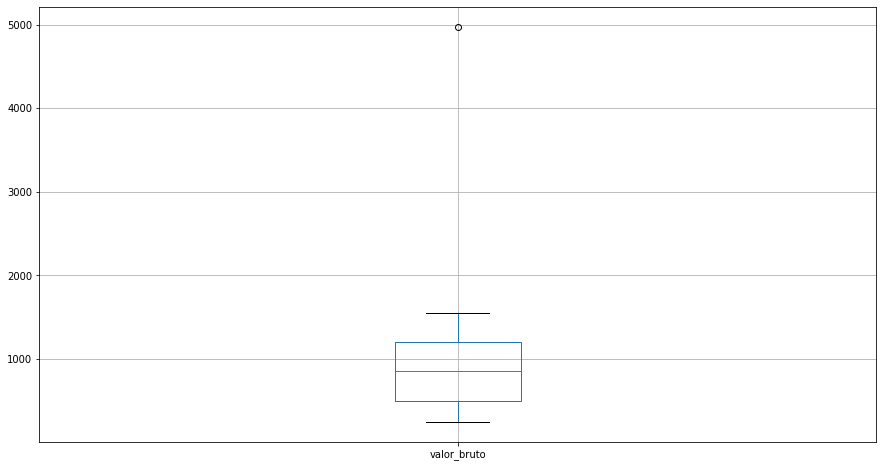

In [ ]:
# Criando um boxplot para verificar possívels Outliers

dias_sexta.boxplot(column='valor_bruto', figsize=(15,8))
plt.show()

In [ ]:
# Criando a variável para a remoção dos Outliers encontrados

vari_sexta = dias_sexta['valor_bruto']
Q1 = vari_sexta.quantile(.25)
Q3 = vari_sexta.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
# Removendo os Outliers

selecao = (vari_sexta >= limite_inferior) & ( vari_sexta <= limite_superior)
sexta_boxplot = dias_sexta[selecao]
sexta_boxplot.head(5)

,data,quantidade_vendida,valor_bruto,dia_semana
7,2022-01-14,62,1136.0,Sexta-feira
10,2022-01-21,84,1209.0,Sexta-feira
14,2022-01-28,62,869.0,Sexta-feira
17,2022-02-04,26,502.0,Sexta-feira
20,2022-02-11,14,246.0,Sexta-feira


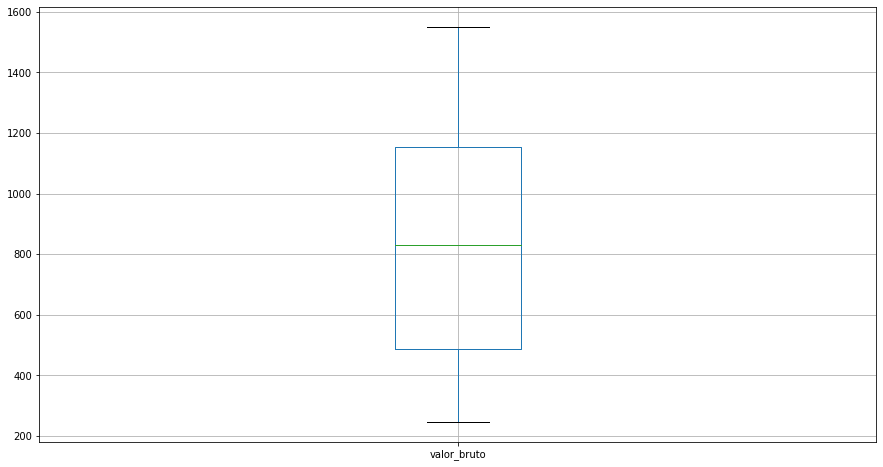

In [ ]:
# Removidos os outliers, uma nova apresentação para ter certeza da remoção e observar se há algum novo

sexta_boxplot.boxplot(['valor_bruto'], figsize=(15,8))

In [ ]:
# A nova média de vendas por sexta feira, depois da remoção do outliers

sexta_boxplot['valor_bruto'].mean()

830.4916666666667

In [ ]:
# Novo df, já sem o outliers

sexta_boxplot.head(5)

,data,quantidade_vendida,valor_bruto,dia_semana
7,2022-01-14,62,1136.0,Sexta-feira
10,2022-01-21,84,1209.0,Sexta-feira
14,2022-01-28,62,869.0,Sexta-feira
17,2022-02-04,26,502.0,Sexta-feira
20,2022-02-11,14,246.0,Sexta-feira


In [ ]:
# Exportar a tabela para usar no Dashboard do PowerBI

sexta_boxplot.to_excel('vendas_sexta.xlsx', index=True)

# CONCLUSÃO

Após a análise feita, concluímos que há necessidade em estudar alguma possibilidade de mudança na sexta-feira, visto que o faturamento médio é 4x menor que no sábado e 5x menor que no domingo. Partindo do princípio que podemos melhorar o faturamento geral, sugerimos neste estudo:

- Ampliação horário de funcionamento;
- Criação de promoções atrativas;
- Criação de um happy hour;
- Possibilidade de colocar música ao vivo;
- Investir em um ambiente propício para noite.